In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [5]:
import warnings
warnings.simplefilter(action='ignore')

In [7]:
url = "https://raw.githubusercontent.com/bilozorov/mlops-capstone/main/heart.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.shape

(303, 14)

## Exploratory Data Analysis (EDA)

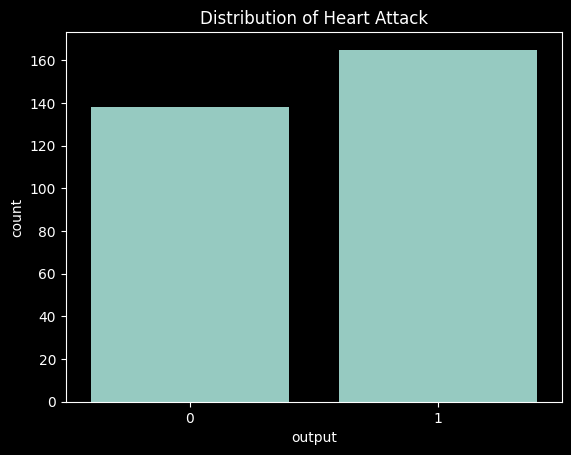

In [12]:
sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Attack')
plt.show()

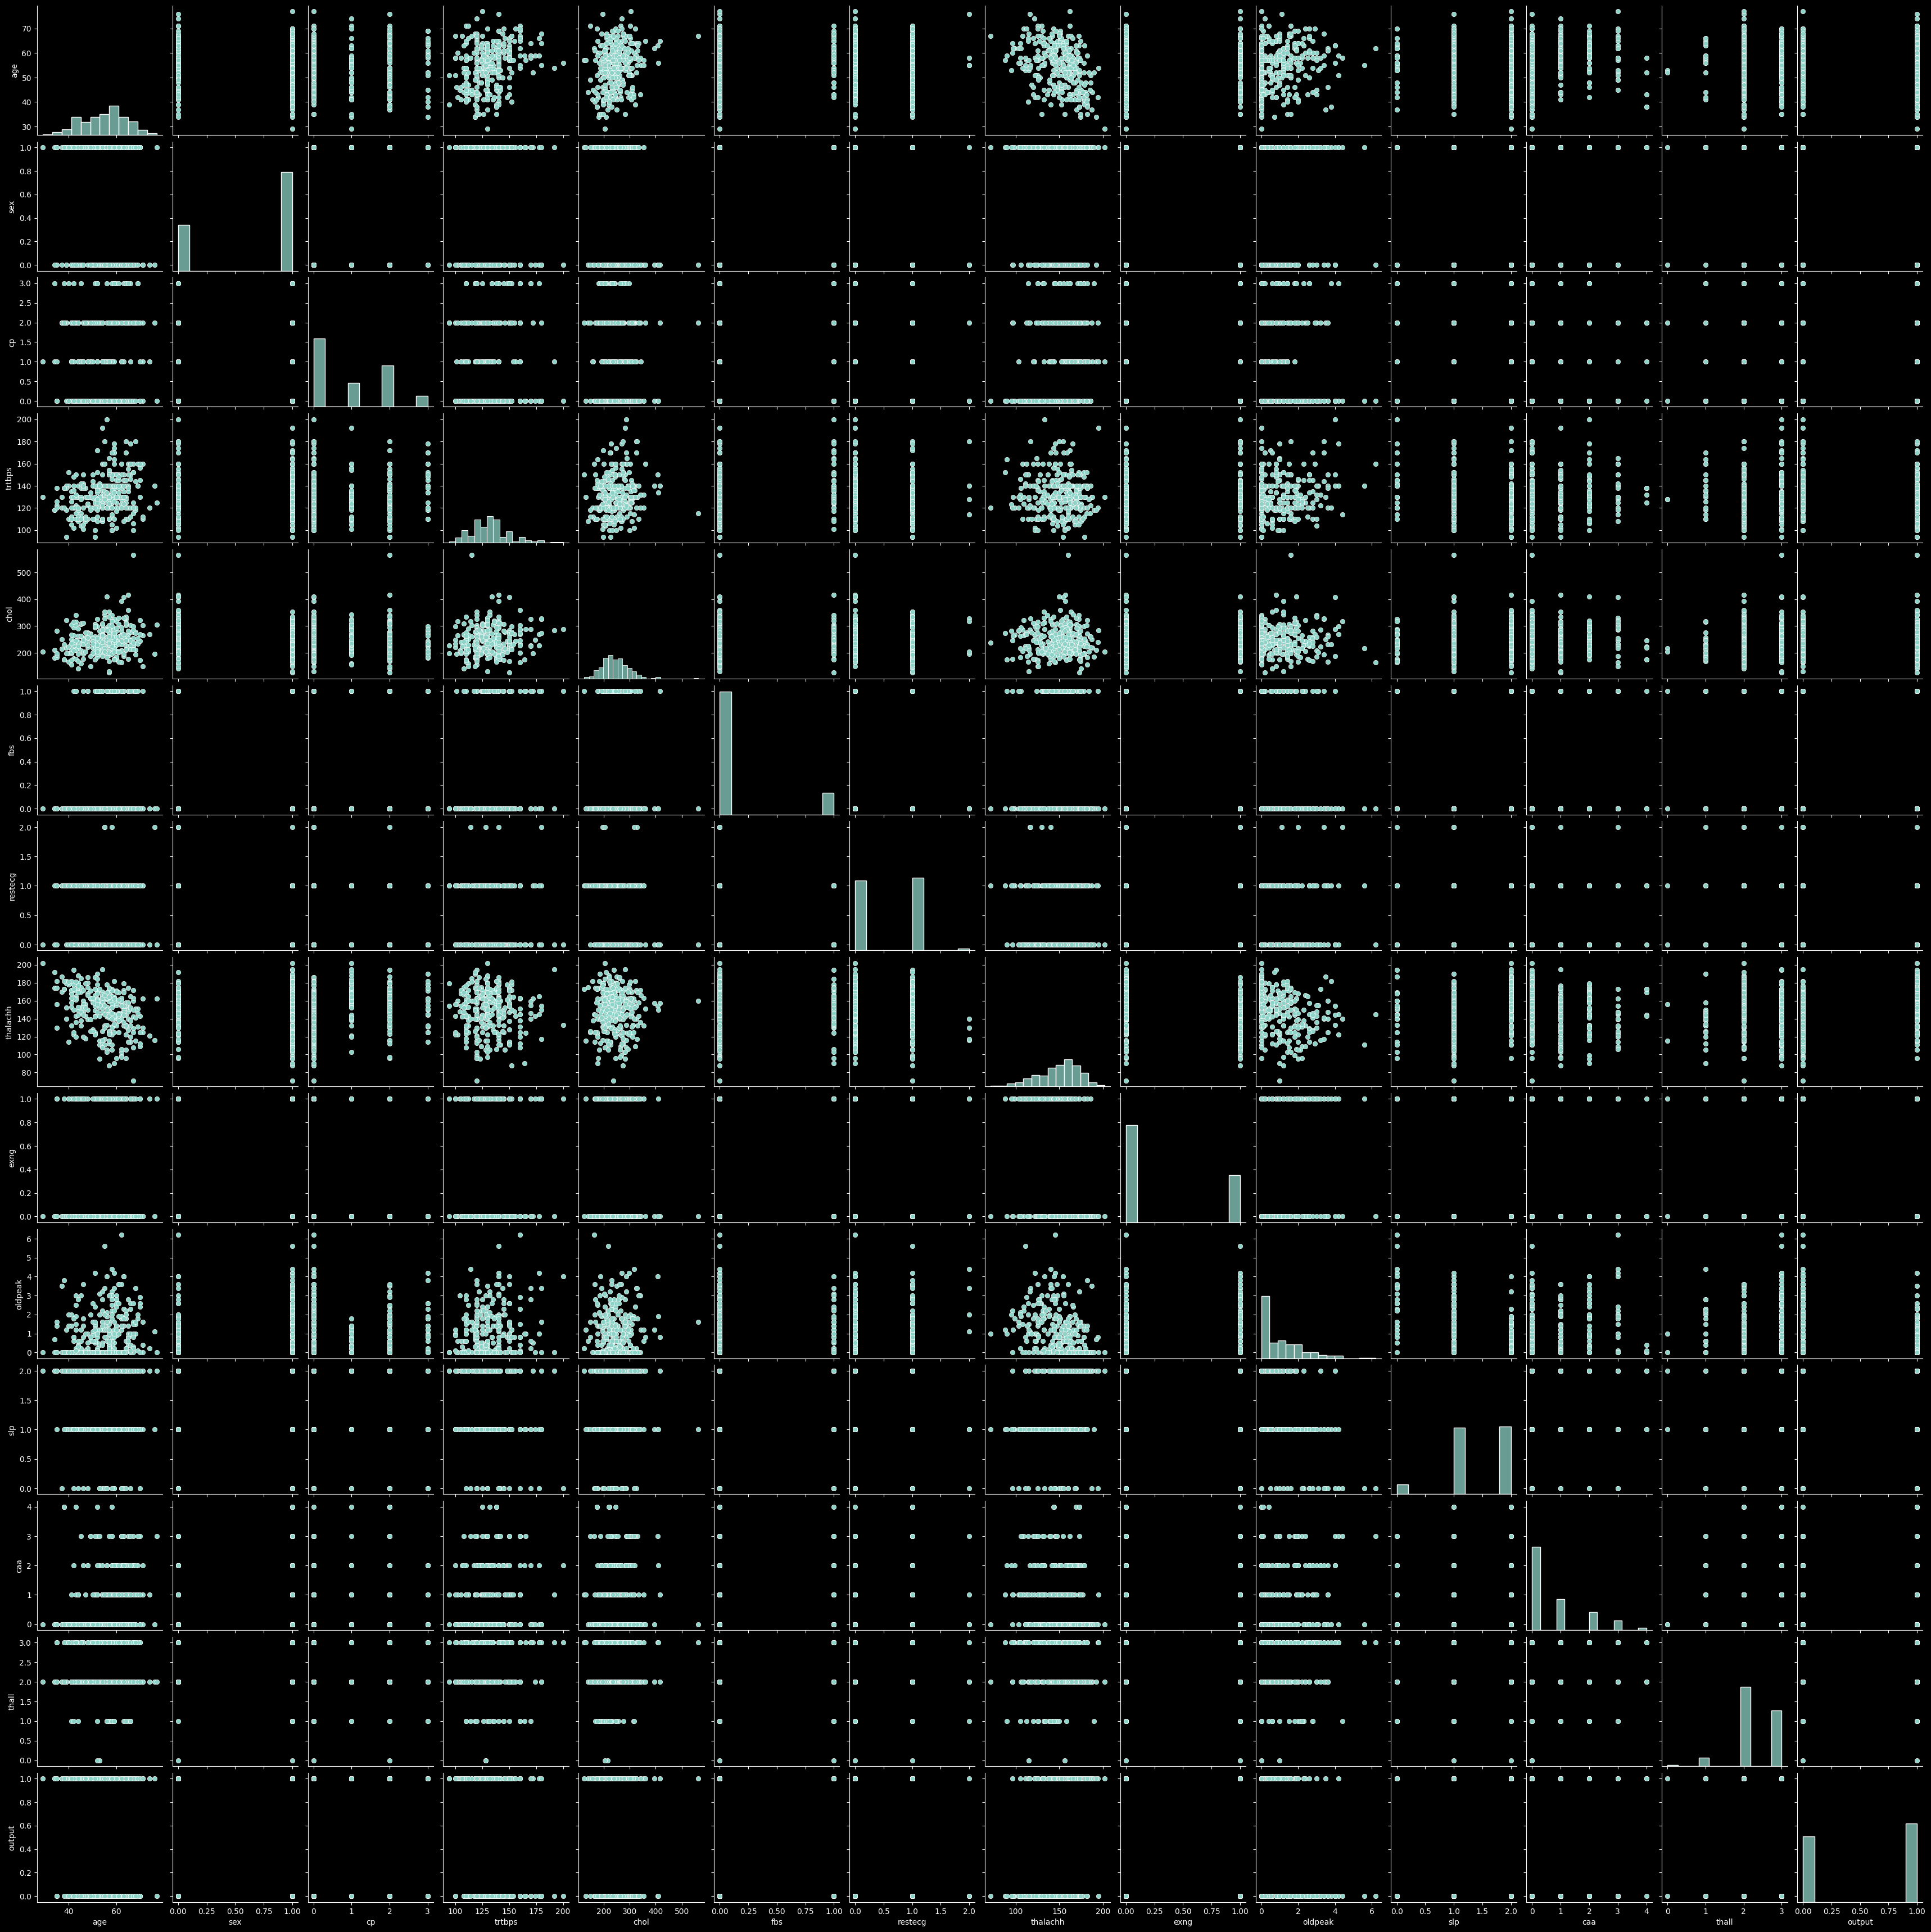

In [13]:
sns.pairplot(df)
plt.show()

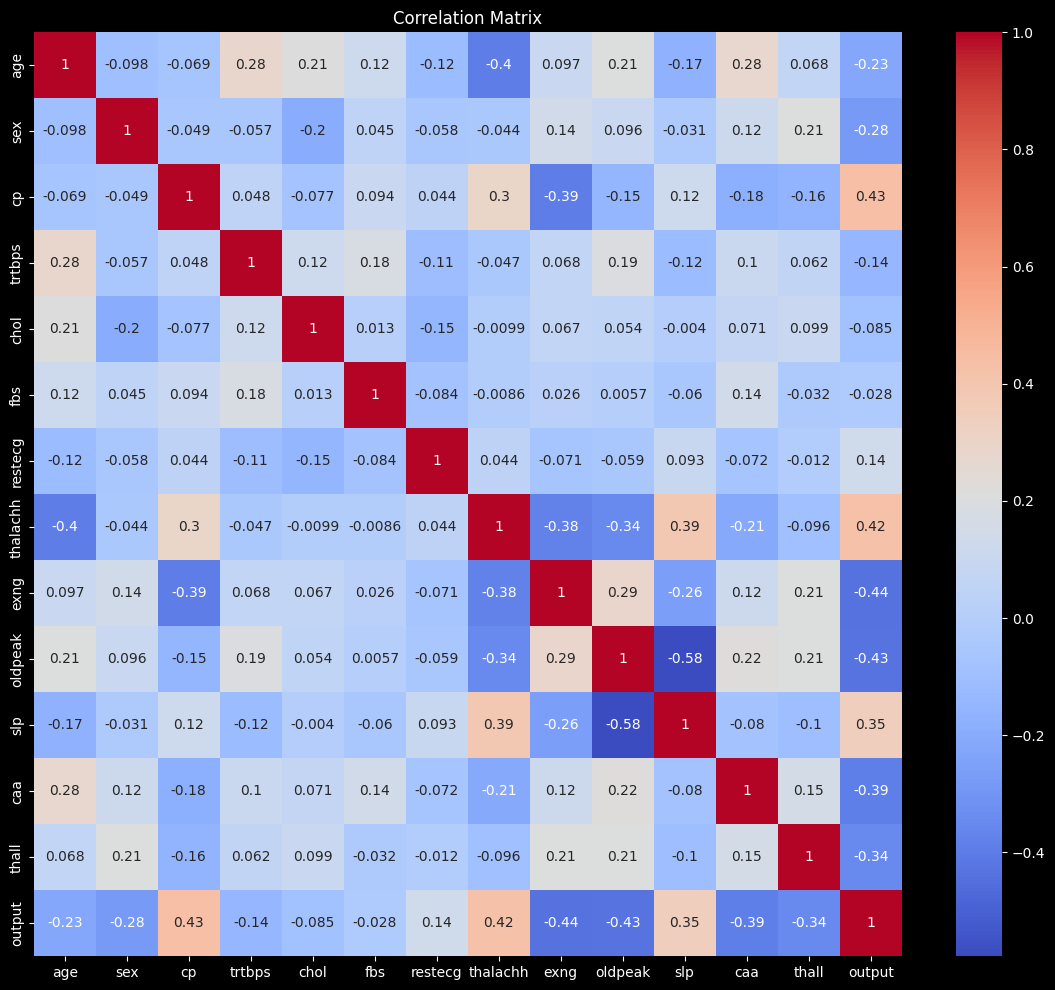

In [14]:
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Building

In [15]:
# Split the data into features (X) and target variable (y)
X = df.drop('output', axis=1)
y = df['output']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [18]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    # print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    # print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.85
Decision Tree Accuracy: 0.85
Random Forest Accuracy: 0.85
SVM Accuracy: 0.87
KNN Accuracy: 0.90
Gradient Boosting Accuracy: 0.79
XGBoost Accuracy: 0.82
AdaBoost Accuracy: 0.80
Naive Bayes Accuracy: 0.87
MLP Neural Network Accuracy: 0.87


## Model Comparison

In [45]:
df2 = df.copy()

In [46]:
X = df2.drop('output', axis=1)
y = df2['output']

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [52]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [53]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    # print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    # print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.85
Decision Tree Accuracy: 0.84
Random Forest Accuracy: 0.84
SVM Accuracy: 0.87
KNN Accuracy: 0.92
Gradient Boosting Accuracy: 0.79
XGBoost Accuracy: 0.82
AdaBoost Accuracy: 0.80
Naive Bayes Accuracy: 0.87
MLP Neural Network Accuracy: 0.87


In [69]:
from mlflow.entities import ViewType
from mlflow.tracking import MlflowClient
import mlflow

EXPERIMENT_NAME = "CapstoneHearAllModelsExperiment"
mlflow.set_tracking_uri("http://0.0.0.0:5001")
# mlflow.set_experiment(EXPERIMENT_NAME)

In [70]:
client = MlflowClient()
client

In [71]:
client.tracking_uri

'http://0.0.0.0:5001'

In [72]:

experiment = client.get_experiment_by_name(EXPERIMENT_NAME)
experiment

<Experiment: artifact_location='mlflow-artifacts:/5', creation_time=1723889229776, experiment_id='5', last_update_time=1723889229776, lifecycle_stage='active', name='CapstoneHearAllModelsExperiment', tags={}>

In [73]:
best_run = client.search_runs(
        experiment_ids=experiment.experiment_id,
        run_view_type=ViewType.ACTIVE_ONLY,
        max_results=1,
        order_by=["metrics.test_rmse ASC"]
    )[0] = client.search_runs(
        experiment_ids=experiment.experiment_id,
        run_view_type=ViewType.ACTIVE_ONLY,
        max_results=1,
        order_by=["metrics.test_rmse ASC"]
    )[0]

In [ ]:
best_run = client.search_runs(
        experiment_ids=experiment.experiment_id,
        run_view_type=ViewType.ACTIVE_ONLY,
        max_results=1,
        order_by=["metrics.test_rmse ASC"]
    )[0]

In [75]:
run_id_best_model = best_run.info.run_id
run_id_best_model

'533a9e211f6747f3b3122da2a9208e96'

In [88]:
best_run.data.tags.get

{'mlflow.user': 'root',
 'mlflow.source.name': '/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.runName': 'masked-skunk-814',
 'mlflow.log-model.history': '[{"run_id": "533a9e211f6747f3b3122da2a9208e96", "artifact_path": "models", "utc_time_created": "2024-08-17 10:17:35.150209", "flavors": {"python_function": {"model_path": "model.pkl", "predict_fn": "predict", "loader_module": "mlflow.sklearn", "python_version": "3.10.14", "env": {"conda": "conda.yaml", "virtualenv": "python_env.yaml"}}, "sklearn": {"pickled_model": "model.pkl", "sklearn_version": "1.5.0", "serialization_format": "cloudpickle", "code": null}}, "model_uuid": "30efd728826d468c91b2397347639f90", "mlflow_version": "2.12.1", "model_size_bytes": 33970}]',
 'model_name': 'KNN'}

In [93]:
import numpy as np
import pickle

# Load the saved scaler
# with open("best_model_scaler_KNN.bin", "rb") as f_in:
with open("scaler.bin", "rb") as f_in:
    scaler = pickle.load(f_in)

# Load the saved model
with open("best_model_KNN.bin", "rb") as f_in:
# with open("model_KNN.bin", "rb") as f_in:
    model = pickle.load(f_in)

# New test data as a NumPy array
new_data = np.array([[54.366337, 0.683168, 0.966997, 131.623762, 246.264026, 0.148515, 
                      0.528053, 149.646865, 0.326733, 1.039604, 1.399340, 0.729373, 2.313531]])

# Apply the scaler to the new data
scaled_data = scaler.transform(new_data)

# Predict using the loaded model
prediction = model.predict(scaled_data)

print(f"Prediction: {prediction[0]}")

Prediction: 1


In [114]:
EXPERIMENT_NAME = "CapstoneHearAllModelsExperiment"
mlflow.set_tracking_uri("http://0.0.0.0:5001")
client = MlflowClient()
run_id_best_model = '78ef03c1187549b7bcc03cd90f176b98'

In [117]:
artifact_path = "scaler/scaler.bin"

# Load the artifact
# artifact_uri = f"runs:/{run_id_best_model}/{artifact_path}"
artifact_local_path = mlflow.artifacts.download_artifacts(
    artifact_uri=f"runs:/{run_id_best_model}/{artifact_path}"
)
artifact_local_path




'/var/folders/bw/xn7fzq7s19345glv1sllmzdc0000gn/T/tmpyyheep_m/scaler.bin'

In [118]:
with open(artifact_local_path, "rb") as f:
    dict_vectorizer = pickle.load(f)

In [119]:
dict_vectorizer

StandardScaler()

In [120]:
import numpy as np
import pickle

# Load the saved scaler
# with open("best_model_scaler_KNN.bin", "rb") as f_in:
with open("scaler.bin", "rb") as f_in:
    scaler = pickle.load(f_in)

# Load the saved model
with open("best_model_KNN.bin", "rb") as f_in:
# with open("model_KNN.bin", "rb") as f_in:
    model = pickle.load(f_in)

# New test data as a NumPy array
new_data = np.array([[54.366337, 0.683168, 0.966997, 131.623762, 246.264026, 0.148515, 
                      0.528053, 149.646865, 0.326733, 1.039604, 1.399340, 0.729373, 2.313531]])

# Apply the scaler to the new data
scaled_data1 = scaler.transform(new_data)
scaled_data2 = dict_vectorizer.transform(new_data)

# Predict using the loaded model
prediction1 = model.predict(scaled_data1)
prediction2 = model.predict(scaled_data2)

print(f"Prediction1: {prediction1[0]}")
print(f"Prediction2: {prediction2[0]}")

Prediction1: 1
Prediction2: 1


In [121]:
scaled_data1

array([[ 4.04028377e-08, -6.81005225e-07,  2.91484067e-07,
        -2.14880239e-08, -7.78121737e-09,  4.17634535e-07,
         3.70900503e-07,  1.37108834e-08,  6.96630546e-07,
         3.41661605e-08,  1.07291444e-07,  6.14214867e-08,
        -5.77712010e-07]])

In [122]:
scaled_data2

array([[ 4.04028377e-08, -6.81005225e-07,  2.91484067e-07,
        -2.14880239e-08, -7.78121737e-09,  4.17634535e-07,
         3.70900503e-07,  1.37108834e-08,  6.96630546e-07,
         3.41661605e-08,  1.07291444e-07,  6.14214867e-08,
        -5.77712010e-07]])

In [123]:
import numpy as np
import pickle

# Load the saved scaler
with open("best_model_scaler_KNN.bin", "rb") as f_in:
# with open("scaler.bin", "rb") as f_in:
    scaler = pickle.load(f_in)

# Load the saved model
with open("best_model_KNN.bin", "rb") as f_in:
# with open("model_KNN.bin", "rb") as f_in:
    model = pickle.load(f_in)

# New test data as a NumPy array
new_data = np.array([[54.366337, 0.683168, 0.966997, 131.623762, 246.264026, 0.148515, 
                      0.528053, 149.646865, 0.326733, 1.039604, 1.399340, 0.729373, 2.313531]])

# Apply the scaler to the new data
scaled_data = scaler.transform(new_data)

# Predict using the loaded model
prediction = model.predict(scaled_data)

print(f"Prediction: {prediction[0]}")

Prediction: 1


In [125]:
import numpy as np
import pickle
import mlflow
from mlflow.tracking import MlflowClient


EXPERIMENT_NAME = "CapstoneHearAllModelsExperiment"
# mlflow.set_tracking_uri("http://mlflow:5000")
mlflow.set_tracking_uri("http://0.0.0.0:5001")

client = MlflowClient()

run_id = 'f147d40caf35451fa33912a2fd272c6d'

#Load Artifact from Mlflow
artifact_path = "scaler/scaler.bin"
artifact_local_path = mlflow.artifacts.download_artifacts(
    artifact_uri=f"runs:/{run_id}/{artifact_path}"
)
with open(artifact_local_path, "rb") as f:
    loaded_scaler = pickle.load(f)

logged_model_url = f'runs:/{run_id}/models'
loaded_model = mlflow.pyfunc.load_model(logged_model_url)


# New test data as a NumPy array
new_data = np.array([[54.366337, 0.683168, 0.966997, 131.623762, 246.264026, 0.148515, 
                      0.528053, 149.646865, 0.326733, 1.039604, 1.399340, 0.729373, 2.313531]])

# Apply the scaler to the new data
scaled_data = loaded_scaler.transform(new_data)

# Predict using the loaded model
prediction = loaded_model.predict(scaled_data)

print(f"Prediction: {prediction[0]}")

2024/08/17 15:23:27 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - packaging (current: 24.1, required: packaging==23.2)
 - psutil (current: 6.0.0, required: psutil==5.9.8)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/08/17 15:23:27 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.10.14`, differs from the version of Python that is currently running, `Python 3.11.8`, and may be incompatible


Prediction: 1


# FINAL TESTING

In [126]:
import numpy as np
import pickle
import mlflow
from mlflow.tracking import MlflowClient


EXPERIMENT_NAME = "CapstoneHearAllModelsExperiment"
# mlflow.set_tracking_uri("http://mlflow:5000")
mlflow.set_tracking_uri("http://0.0.0.0:5001")

client = MlflowClient()

run_id = 'f147d40caf35451fa33912a2fd272c6d'

In [127]:
#Load Artifact from Mlflow
artifact_path = "scaler/scaler.bin"
artifact_local_path = mlflow.artifacts.download_artifacts(
    artifact_uri=f"runs:/{run_id}/{artifact_path}"
)
with open(artifact_local_path, "rb") as f:
    loaded_scaler = pickle.load(f)

logged_model_url = f'runs:/{run_id}/models'
loaded_model = mlflow.pyfunc.load_model(logged_model_url)

2024/08/18 12:58:50 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - packaging (current: 24.1, required: packaging==23.2)
 - psutil (current: 6.0.0, required: psutil==5.9.8)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/08/18 12:58:50 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.10.14`, differs from the version of Python that is currently running, `Python 3.11.8`, and may be incompatible


In [129]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models
  flavor: mlflow.sklearn
  run_id: f147d40caf35451fa33912a2fd272c6d

In [130]:
loaded_scaler

StandardScaler()

In [135]:

data = {
    "age": 54.366337,
    "sex": 0.683168,
    "cp": 0.966997,
    "trtbps": 131.623762,
    "chol": 246.264026,
    "fbs": 0.148515,
    "restecg": 0.528053,
    "thalachh": 149.646865,
    "exng": 0.326733,
    "oldpeak": 1.039604,
    "slp": 1.39934,
    "caa": 0.729373,
    "thall": 2.313531
}

# data_json = data.json()

# New test data as a NumPy array
# new_data = np.array([[54.366337, 0.683168, 0.966997, 131.623762, 246.264026, 0.148515, 
#                       0.528053, 149.646865, 0.326733, 1.039604, 1.399340, 0.729373, 2.313531]])

# new_data = data_json.get_json()

new_data = pd.DataFrame([data])
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.39934,0.729373,2.313531


In [136]:
# Apply the scaler to the new data
scaled_data = loaded_scaler.transform(new_data)
scaled_data

array([[ 4.04028377e-08, -6.81005225e-07,  2.91484067e-07,
        -2.14880239e-08, -7.78121737e-09,  4.17634535e-07,
         3.70900503e-07,  1.37108834e-08,  6.96630546e-07,
         3.41661605e-08,  1.07291444e-07,  6.14214867e-08,
        -5.77712010e-07]])

In [137]:
# Predict using the loaded model
prediction = loaded_model.predict(scaled_data)

print(f"Prediction: {prediction[0]}")

Prediction: 1
